In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import statsmodels.api as sm
import seaborn as sns
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Practice Datasets\\gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [3]:
df.shape

(139, 10)

In [4]:
df.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

## Why region column should be one hot encoded?
Encoding is specifically used to get rid of categorical columns. when you use Label encoding for input features, it asssumes that higher the value of categorical variable better is that category, which can't be a good practice with above dataset because in case of "Region" column each region has equal weightage to be given there is no priority among the regions. "Binarization" will help us solve the problem implies One Hot Encoding

In [5]:
data=pd.get_dummies(df)

In [6]:
data.shape

(139, 15)

In [7]:
data=data.drop(["Region_Middle East & North Africa"],1)

In [8]:
data.shape

(139, 14)

## K-Nearest Neighbors (Regression)

In [9]:
df1=data

In [10]:
cols=list(df1)

In [11]:
scaler=MinMaxScaler()

In [12]:
df1=pd.DataFrame(scaler.fit_transform(df1))

In [13]:
df1.columns=cols

In [14]:
df1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_South Asia,Region_Sub-Saharan Africa
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.804813,0.141574,0.0,0.0,0.0,0.0,0.0
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,0.350267,1.000000,0.0,0.0,0.0,0.0,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.810160,0.067089,1.0,0.0,0.0,0.0,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.729947,0.091389,0.0,0.0,1.0,0.0,0.0
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.970588,0.013207,0.0,1.0,0.0,0.0,0.0


In [15]:
X=df1.drop(["life"],1)
y=df["life"]

In [16]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.3,random_state=42)

In [17]:
knn=KNeighborsRegressor()

In [18]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [19]:
y_pred=knn.predict(X_test)

In [20]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=math.sqrt(mse)
n=df.shape[0]
k=(df.shape[1]-1)
ar2=1-((1-r2)*((n-1)/(n-(k+1))))

In [21]:
print("R-square: ",r2)
print("Adjusted R-Square: ",ar2)
print("Mean Absolute Error: ",mae)
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error: ",rmse)

R-square:  0.747278876437
Adjusted R-Square:  0.729647170142
Mean Absolute Error:  2.93333333333
Mean Squared Error:  16.4580190476
Root Mean Squared Error:  4.056848413192075


In [22]:
r2=[]
for i in range(3,12):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    r2.append(r2_score(y_test,y_pred))

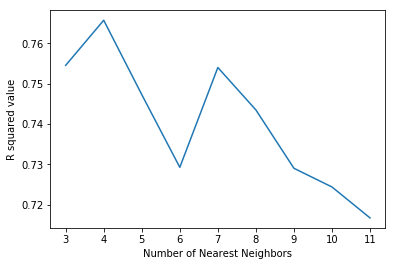

In [23]:
import matplotlib.pyplot as plt
x=np.arange(3,12)
plt.plot(x,r2)
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("R squared value")
plt.show()

In [24]:
y_pred=list(y_pred)
y_test=list(y_test)
tuples=list(zip(y_test,y_pred))

In [25]:
pd.DataFrame(tuples,columns=["Actual","Predicted"]).head()

,Actual,Predicted
0,68.7,75.154545
1,66.1,73.872727
2,76.5,72.690909
3,67.4,60.245455
4,79.4,79.600000


## K-Nearest Neighbors (Classification)

## Why one hot encoding is not correct for classification
Now region is an output feature where every region is seperate category (label) and there is no interdependency among them so each of them can be labeled seperately without giving each of them equal weightage.

In [26]:
data1=df

In [27]:
data1["Region"]=data1["Region"].astype("category")
d=dict(enumerate(data1["Region"].cat.categories))
data1["Region"]=data1["Region"].cat.codes
print(d)

{0: 'America', 1: 'East Asia & Pacific', 2: 'Europe & Central Asia', 3: 'Middle East & North Africa', 4: 'South Asia', 5: 'Sub-Saharan Africa'}


In [28]:
column=list(data1)

In [29]:
data1=pd.DataFrame(scaler.fit_transform(data1))

In [30]:
data1.columns=column

In [31]:
Xc=data1.drop(["Region"],1)
yc=df["Region"]

In [32]:
Xc_train,Xc_test,yc_train,yc_test=tts(Xc,yc,test_size=0.3,random_state=42)

In [33]:
knnc=KNeighborsClassifier()

In [34]:
data1.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.804813,0.141574,0.6
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,0.350267,1.000000,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.810160,0.067089,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.729947,0.091389,0.4
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.970588,0.013207,0.2


In [35]:
knnc.fit(Xc_train,yc_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
yc_pred=knnc.predict(Xc_test)

In [37]:
accuracy_score(yc_test,yc_pred)

0.76190476190476186

In [38]:
accuracy=[]
for i in range(3,12):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xc_train,yc_train)
    yc_pred=knn.predict(Xc_test)
    accuracy.append(accuracy_score(yc_test,yc_pred))

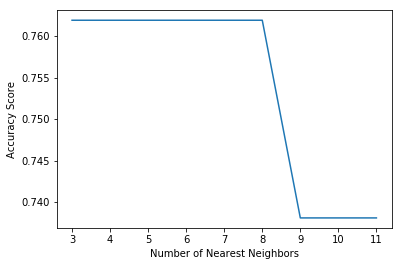

In [39]:
import matplotlib.pyplot as plt
x=np.arange(3,12)
plt.plot(x,accuracy)
plt.xlabel("Number of Nearest Neighbors")
plt.ylabel("Accuracy Score")
plt.show()

In [40]:
yc_pred=list(yc_pred)
yc_test=list(yc_test)

In [41]:
result=list(zip(yc_test,yc_pred))

In [42]:
pd.DataFrame(result,columns=["Actual","Predicted"]).head()

,Actual,Predicted
0,2,0
1,2,2
2,2,2
3,5,5
4,2,2


## Linear Regression (using Correlation Heatmap)

5 Assumptions of Linear Regression:

1) Linear Relation: Every Independent variable must have high linear relationship with output variable and also check for outliers as Linear Regression is suseptible to outliers

2) No Multicollinearity: There should No or very less collinearity among the independent variables, all independent variables should be strictly and highly corelated to output variable

3) No Homoscedacity: residuals are equal across the regression line

4) No Autocorrelation: Autocorrelation in simple words is y(x+1) is not independent of y(x). That is Degree of similarities of values of same variable over successive time interval should be less.

5) Multivariate Normality: The residuals should be noramlly distributed 

In [43]:
df=pd.read_csv("C:\\Users\\Neel\\Desktop\\Greyatom Codes\\Practice Datasets\\gapminder.csv")

In [44]:
data2=df1

In [45]:
data2.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_South Asia,Region_Sub-Saharan Africa
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058,-0.013131,0.052950,-0.087661,0.394109,-0.109651
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704,-0.166060,-0.147947,-0.527514,-0.047537,0.843908
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913,-0.119511,-0.118288,-0.244338,-0.091429,0.529699
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186,0.011841,-0.004024,0.289134,-0.125772,-0.370605
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691,0.287028,-0.108400,0.521400,-0.297883,-0.655982
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874,-0.059432,0.015921,0.426041,-0.136921,-0.410489
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053,-0.413930,-0.330121,-0.044888,-0.098710,0.676033
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106,0.228923,0.073007,0.457661,-0.005864,-0.795163
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000,-0.234225,-0.119082,-0.479644,0.020088,0.825253
Region_America,-0.013131,-0.166060,-0.119511,0.011841,0.287028,-0.059432,-0.413930,0.228923,-0.234225,1.000000,-0.164317,-0.317579,-0.113067,-0.312094


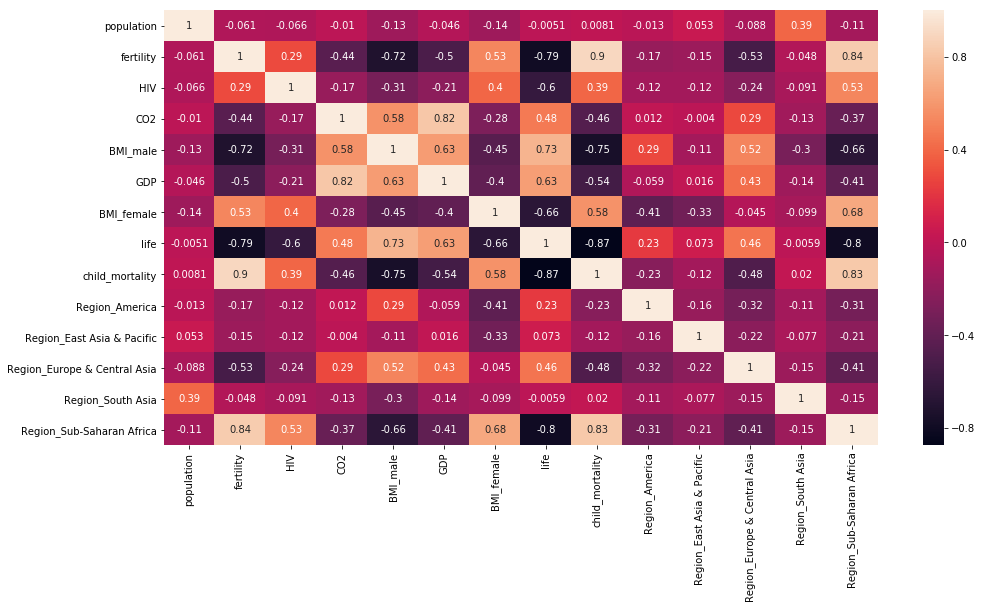

In [46]:
plt.figure(figsize=(16,8))
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [47]:
XL=data2[["GDP","child_mortality","HIV"]]
yL=df["life"]

In [48]:
XL_train,XL_test,yL_train,yL_test=tts(XL,yL,test_size=0.3,random_state=0)

In [49]:
linreg=LinearRegression()

In [50]:
linreg.fit(XL_train,yL_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
yL_pred=linreg.predict(XL_test)

In [52]:
rL2=r2_score(yL_test,yL_pred)
maeL=mean_absolute_error(yL_test,yL_pred)
mseL=mean_squared_error(yL_test,yL_pred)
rmseL=math.sqrt(mseL)
ar2L=1-((1-rL2)*((n-1)/(n-(k+1))))

In [53]:
print("R-square: ",rL2)
print("Adjusted R-Square: ",ar2L)
print("Mean Absolute Error: ",maeL)
print("Mean Squared Error: ",mseL)
print("Root Mean Squared Error: ",rmseL)

R-square:  0.809697249695
Adjusted R-Square:  0.796420313628
Mean Absolute Error:  2.78631975083
Mean Squared Error:  14.1214447143
Root Mean Squared Error:  3.7578510766555024


## Linear Regression (Using Backward Elimination)

In [54]:
X_for_OLS=data2.drop(["life"],1)
y_for_OLS=df["life"]

In [55]:
X_for_OLS=sm.add_constant(X_for_OLS)

In [56]:
model_1=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     91.86
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           2.21e-57
Time:                        00:20:13   Log-Likelihood:                -340.25
No. Observations:                 139   AIC:                             708.5
Df Residuals:                     125   BIC:                             749.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           78.7979      2.123     37.112      0.000      74.596      83.000
population                      -2.5418      3.052     -0.833      0.407      -8.583       3.499
fertility                       -5.9609      2.958     -2.015      0.046     -11.815      -0.107
HIV                            -16.5446      1.930     -8.574      0.000     -20.363     -12.726
CO2                            -10.2351      3.695     -2.770      0.006     -17.549      -2.921
BMI_male                         1.1335      2.019      0.562      0.575      -2.861       5.128
GDP                             17.5278      3.528      4.968      0.000      10.545      24.510
BMI_female                      -6.1496      1.775     -3.465      0.001      -9.662      -2.637
child_mortality                -16.9211      2.791     -6.064      0.000     -22.444     -11.398
Region_America                  -1.2584      1.201     -1.048      0.297      -3.634       1.118
Region_East Asia & Pacific      -3.8781      1.414     -2.742      0.007      -6.677      -1.079
Region_Europe & Central Asia    -1.6986      1.108     -1.534      0.128      -3.891       0.493
Region_South Asia               -1.5331      1.802     -0.851      0.396      -5.099       2.033
Region_Sub-Saharan Africa       -0.1189      1.603     -0.074      0.941      -3.291       3.054
==============================================================================
Omnibus:                        2.432   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.296   Jarque-Bera (JB):                2.135
Skew:                          -0.122   Prob(JB):                        0.344
Kurtosis:                       3.556   Cond. No.                         27.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X_for_OLS=X_for_OLS.drop(["population"],1)
model_2=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     99.69
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           3.04e-58
Time:                        00:20:14   Log-Likelihood:                -340.63
No. Observations:                 139   AIC:                             707.3
Df Residuals:                     126   BIC:                             745.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           78.5768      2.104     37.346      0.000      74.413      82.741
fertility                       -5.6979      2.938     -1.940      0.055     -11.511       0.115
HIV                            -16.4914      1.926     -8.562      0.000     -20.303     -12.680
CO2                            -10.4843      3.679     -2.850      0.005     -17.765      -3.204
BMI_male                         1.2663      2.010      0.630      0.530      -2.711       5.244
GDP                             17.6644      3.520      5.018      0.000      10.699      24.630
BMI_female                      -5.9993      1.764     -3.402      0.001      -9.489      -2.509
child_mortality                -17.1803      2.770     -6.203      0.000     -22.662     -11.699
Region_America                  -1.2569      1.199     -1.048      0.297      -3.630       1.116
Region_East Asia & Pacific      -3.8703      1.413     -2.740      0.007      -6.666      -1.075
Region_Europe & Central Asia    -1.6945      1.106     -1.532      0.128      -3.884       0.495
Region_South Asia               -1.8622      1.756     -1.061      0.291      -5.337       1.612
Region_Sub-Saharan Africa       -0.1146      1.601     -0.072      0.943      -3.283       3.054
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.733
Skew:                          -0.113   Prob(JB):                        0.420
Kurtosis:                       3.499   Cond. No.                         27.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X_for_OLS=X_for_OLS.drop(["BMI_male"],1)
model_3=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     109.2
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           3.45e-59
Time:                        00:20:14   Log-Likelihood:                -340.85
No. Observations:                 139   AIC:                             705.7
Df Residuals:                     127   BIC:                             740.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           79.4442      1.587     50.046      0.000      76.303      82.585
fertility                       -5.9810      2.896     -2.065      0.041     -11.712      -0.250
HIV                            -16.5213      1.921     -8.601      0.000     -20.323     -12.720
CO2                            -10.1090      3.622     -2.791      0.006     -17.276      -2.942
GDP                             17.9523      3.482      5.156      0.000      11.062      24.842
BMI_female                      -6.0860      1.754     -3.470      0.001      -9.557      -2.615
child_mortality                -17.4230      2.736     -6.367      0.000     -22.838     -12.008
Region_America                  -1.2181      1.195     -1.020      0.310      -3.582       1.146
Region_East Asia & Pacific      -4.1555      1.335     -3.113      0.002      -6.797      -1.514
Region_Europe & Central Asia    -1.6678      1.103     -1.512      0.133      -3.850       0.514
Region_South Asia               -2.3743      1.553     -1.529      0.129      -5.446       0.698
Region_Sub-Saharan Africa       -0.3126      1.566     -0.200      0.842      -3.412       2.786
==============================================================================
Omnibus:                        1.807   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.379
Skew:                          -0.119   Prob(JB):                        0.502
Kurtosis:                       3.426   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X_for_OLS=X_for_OLS.drop(["Region_America"],1)
model_4=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     120.0
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           5.12e-60
Time:                        00:20:14   Log-Likelihood:                -341.42
No. Observations:                 139   AIC:                             704.8
Df Residuals:                     128   BIC:                             737.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           78.1972      1.012     77.257      0.000      76.194      80.200
fertility                       -5.8245      2.892     -2.014      0.046     -11.548      -0.101
HIV                            -16.5962      1.920     -8.645      0.000     -20.395     -12.797
CO2                            -10.0439      3.622     -2.773      0.006     -17.210      -2.878
GDP                             18.6018      3.424      5.433      0.000      11.828      25.376
BMI_female                      -5.4522      1.640     -3.324      0.001      -8.698      -2.206
child_mortality                -17.3958      2.737     -6.356      0.000     -22.811     -11.981
Region_East Asia & Pacific      -3.2027      0.953     -3.359      0.001      -5.089      -1.316
Region_Europe & Central Asia    -0.9052      0.810     -1.117      0.266      -2.509       0.698
Region_South Asia               -1.4533      1.263     -1.151      0.252      -3.952       1.046
Region_Sub-Saharan Africa        0.3277      1.435      0.228      0.820      -2.511       3.167
==============================================================================
Omnibus:                        1.696   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.428   Jarque-Bera (JB):                1.260
Skew:                          -0.116   Prob(JB):                        0.533
Kurtosis:                       3.404   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
X_for_OLS=X_for_OLS.drop(["Region_Europe & Central Asia"],1)
model_5=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     133.0
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           7.98e-61
Time:                        00:20:14   Log-Likelihood:                -342.09
No. Observations:                 139   AIC:                             704.2
Df Residuals:                     129   BIC:                             733.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         78.0232      1.001     77.940      0.000      76.043      80.004
fertility                     -4.8965      2.773     -1.766      0.080     -10.383       0.590
HIV                          -16.1852      1.886     -8.582      0.000     -19.917     -12.454
CO2                           -8.9674      3.494     -2.566      0.011     -15.881      -2.054
GDP                           17.2199      3.195      5.389      0.000      10.898      23.542
BMI_female                    -6.1268      1.527     -4.013      0.000      -9.147      -3.106
child_mortality              -17.6839      2.727     -6.484      0.000     -23.080     -12.288
Region_East Asia & Pacific    -2.8690      0.906     -3.166      0.002      -4.662      -1.076
Region_South Asia             -1.1106      1.226     -0.906      0.367      -3.537       1.315
Region_Sub-Saharan Africa      0.5471      1.423      0.385      0.701      -2.268       3.362
==============================================================================
Omnibus:                        1.685   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.431   Jarque-Bera (JB):                1.267
Skew:                          -0.096   Prob(JB):                        0.531
Kurtosis:                       3.427   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
X_for_OLS=X_for_OLS.drop(["Region_South Asia"],1)
model_6=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     149.7
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           9.47e-62
Time:                        00:20:14   Log-Likelihood:                -342.53
No. Observations:                 139   AIC:                             703.1
Df Residuals:                     130   BIC:                             729.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         77.8425      0.980     79.407      0.000      75.903      79.782
fertility                     -4.7048      2.763     -1.703      0.091     -10.172       0.762
HIV                          -16.1517      1.884     -8.571      0.000     -19.880     -12.424
CO2                           -8.8340      3.489     -2.532      0.013     -15.736      -1.932
GDP                           17.4283      3.185      5.472      0.000      11.128      23.729
BMI_female                    -5.9983      1.519     -3.949      0.000      -9.003      -2.993
child_mortality              -18.1800      2.670     -6.810      0.000     -23.462     -12.898
Region_East Asia & Pacific    -2.7260      0.892     -3.057      0.003      -4.490      -0.962
Region_Sub-Saharan Africa      0.7613      1.402      0.543      0.588      -2.012       3.535
==============================================================================
Omnibus:                        1.318   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.517   Jarque-Bera (JB):                0.887
Skew:                          -0.091   Prob(JB):                        0.642
Kurtosis:                       3.347   Cond. No.                         22.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_for_OLS=X_for_OLS.drop(["Region_Sub-Saharan Africa"],1)
model_7=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     172.0
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           8.05e-63
Time:                        00:20:15   Log-Likelihood:                -342.69
No. Observations:                 139   AIC:                             701.4
Df Residuals:                     131   BIC:                             724.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         77.5684      0.838     92.550      0.000      75.910      79.226
fertility                     -3.8836      2.306     -1.684      0.095      -8.446       0.679
HIV                          -15.6704      1.658     -9.449      0.000     -18.951     -12.390
CO2                           -9.0818      3.450     -2.633      0.009     -15.906      -2.258
GDP                           17.8073      3.099      5.746      0.000      11.677      23.938
BMI_female                    -5.6460      1.370     -4.122      0.000      -8.356      -2.936
child_mortality              -18.0574      2.653     -6.806      0.000     -23.306     -12.809
Region_East Asia & Pacific    -2.7313      0.889     -3.071      0.003      -4.491      -0.972
==============================================================================
Omnibus:                        1.202   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                0.776
Skew:                          -0.091   Prob(JB):                        0.678
Kurtosis:                       3.317   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
X_for_OLS=X_for_OLS.drop(["fertility"],1)
model_8=sm.OLS(y_for_OLS,X_for_OLS).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   life   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     197.4
Date:                Sat, 27 Jul 2019   Prob (F-statistic):           2.21e-63
Time:                        00:20:15   Log-Likelihood:                -344.18
No. Observations:                 139   AIC:                             702.4
Df Residuals:                     132   BIC:                             722.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         77.2965      0.828     93.339      0.000      75.658      78.935
HIV                          -15.2057      1.647     -9.234      0.000     -18.463     -11.948
CO2                           -8.6710      3.465     -2.503      0.014     -15.525      -1.817
GDP                           17.6491      3.119      5.659      0.000      11.479      23.819
BMI_female                    -5.6755      1.379     -4.115      0.000      -8.404      -2.947
child_mortality              -21.8121      1.447    -15.071      0.000     -24.675     -18.949
Region_East Asia & Pacific    -2.5768      0.891     -2.893      0.004      -4.339      -0.815
==============================================================================
Omnibus:                        1.742   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.355
Skew:                          -0.072   Prob(JB):                        0.508
Kurtosis:                       3.462   Cond. No.                         20.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### What are the features given by the Correlation heatmap and the Backward elimination method? Are they the same?
Features by Correlation heatmap: GDP, Child Mortality, HIV

Features by Backward Elimination: HIV, CO2, GDP, BMI_female, Child_mortatlity

In [64]:
XLO=data2[["GDP","child_mortality","HIV","CO2","BMI_female","Region_East Asia & Pacific"]]
yLO=df["life"]

In [65]:
linregols=LinearRegression()

In [66]:
XLO_train,XLO_test,yLO_train,yLO_test=tts(XLO,yLO,test_size=0.3,random_state=0)

In [67]:
linregols.fit(XLO_train,yLO_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
yLO_pred=linregols.predict(XLO_test)

In [69]:
rLO2=r2_score(yLO_test,yLO_pred)
maeLO=mean_absolute_error(yLO_test,yLO_pred)
mseLO=mean_squared_error(yLO_test,yLO_pred)
rmseLO=math.sqrt(mseLO)
ar2LO=1-((1-rL2)*((n-1)/(n-(k+1))))

In [70]:
print("R-square: ",rLO2)
print("Adjusted R-Square: ",ar2LO)
print("Mean Absolute Error: ",maeLO)
print("Mean Squared Error: ",mseLO)
print("Root Mean Squared Error: ",rmseLO)

R-square:  0.840223450743
Adjusted R-Square:  0.796420313628
Mean Absolute Error:  2.49592650553
Mean Squared Error:  11.8562432932
Root Mean Squared Error:  3.443289603449434


In [71]:
yLO_pred=list(yLO_pred)
yLO_test=list(yLO_test)
resultols=list(zip(yLO_test,yLO_pred))
resultols=pd.DataFrame(resultols,columns=["Actual","Predicted"])

In [72]:
resultols["Residuals"]=resultols["Actual"]-resultols["Predicted"]

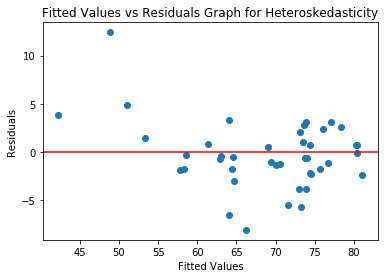

In [73]:
plt.scatter(resultols["Predicted"],resultols["Residuals"])
plt.axhline(y=0,color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted Values vs Residuals Graph for Heteroskedasticity")
plt.show()

In [74]:
resultols.head()

,Actual,Predicted,Residuals
0,68.4,69.448941,-1.048941
1,80.2,77.134090,3.065910
2,46.1,42.239693,3.860307
3,76.4,73.649289,2.750711
4,62.6,63.016129,-0.416129


## Linear Regression (Using Recursive Feature Selection)

In [95]:
model=LinearRegression()

In [96]:
rfe=RFE(model,4)

In [97]:
X_RFE=data.drop(["life"],1)
y_RFE=data["life"]

In [98]:
rfe = rfe.fit(X_RFE,y_RFE)

In [99]:
print(rfe.ranking_)

[10  1  2  8  1  9  5  7  4  1  1  3  6]


In [100]:
X_RFE.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_South Asia,Region_Sub-Saharan Africa
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,0,0,0,0,0
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,0,0,0,0,1
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,1,0,0,0,0
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,0,0,1,0,0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,0,1,0,0,0


In [82]:
columns=list(data)

In [83]:
features=[]
for i in range(0,13):
    if[rank[i]==True]:
        features.append(columns[i])
    else:
        countinue

In [101]:
X_RFE=data[["fertility","BMI_male","Region_Europe & Central Asia","Region_East Asia & Pacific"]]
y_RFE=data["life"]

In [120]:
XRFE_train,XRFE_test,yRFE_train,yRFE_test=tts(X_RFE,y_RFE,test_size=0.3,random_state=42)

In [121]:
linregrfe=LinearRegression()

In [122]:
linregrfe.fit(XRFE_train,yRFE_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
yRFE_pred=linregrfe.predict(XRFE_test)

In [124]:
rRFE2=r2_score(yRFE_test,yRFE_pred)
maeRFE=mean_absolute_error(yRFE_test,yRFE_pred)
mseRFE=mean_squared_error(yRFE_test,yRFE_pred)
rmseRFE=math.sqrt(mseRFE)
ar2RFE=1-((1-rRFE2)*((n-1)/(n-(k+1))))

In [125]:
print("R-square: ",rRFE2)
print("Adjusted R-Square: ",ar2RFE)
print("Mean Absolute Error: ",maeRFE)
print("Mean Squared Error: ",mseRFE)
print("Root Mean Squared Error: ",rmseRFE)

R-square:  0.739378040742
Adjusted R-Square:  0.721195113352
Mean Absolute Error:  3.48125331125
Mean Squared Error:  16.9725470876
Root Mean Squared Error:  4.119775125851769
